In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = ["#421fb4", "#bca3ef", "#ffcf5b", "#905bff", "#ff9d00", "#170c46"]
sns.set_palette(custom_palette)
plt.rcParams['font.family'] = 'serif'

In [15]:
fc_blocksize_sweep = pd.read_csv("data/FC_blocksize_sweep.csv")

In [43]:
def create_latency_plot(files_in, x_axis, x_title, title, legends):
    dfs = []
    for i, file in enumerate(files_in):
        dfs.append(pd.read_csv(file))
        sns.lineplot(x=x_axis, data=dfs[-1], y='Compute Latency', label=legends[i])

    plt.xlabel(x_title)
    plt.ylabel("Latency (Cycles)")
    plt.title(title)
    plt.show()

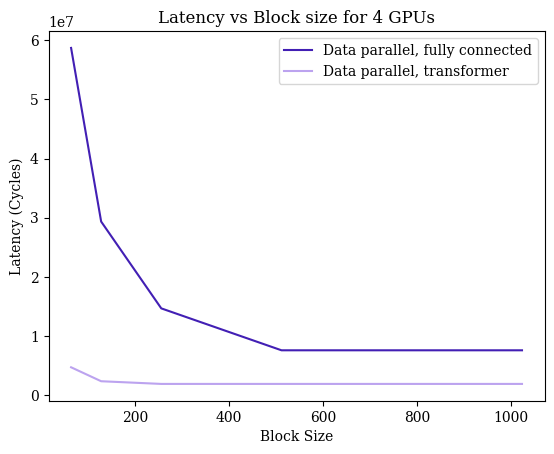

In [45]:
blocksize_files = [
    "data/FC_blocksize_sweep.csv",
    "data/TF_blocksize_sweep.csv"
]
legends = [
    "Data parallel, fully connected",
    "Data parallel, transformer"
] 
title = "Latency vs Block size for 4 GPUs"
x_axis = "Blocksize"
x_title = "Block Size"

create_latency_plot(blocksize_files, x_axis, x_title, title, legends)

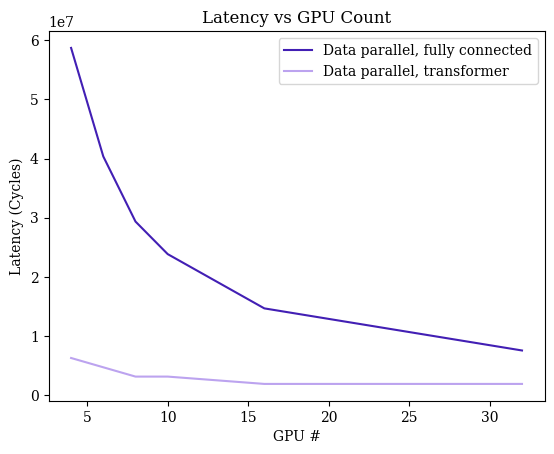

In [49]:
gpu_num_files = [
    "data/FC_GPU_num_sweep.csv",
    "data/TF_GPU_num_sweep.csv",
]
legends = [
    "Data parallel, fully connected",
    "Data parallel, transformer",
] 
title = "Latency vs GPU Count"
x_axis = "GPU #"
x_title = "GPU #"

create_latency_plot(gpu_num_files, x_axis, x_title, title, legends)

In [30]:
def create_latency_plot(file_in, x_axis, x_title, title):
    df = pd.read_csv(file_in)
    sns.lineplot(data=df, x=x_axis, y='Compute Latency')
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel("Latency (Cycles)")
    plt.show()

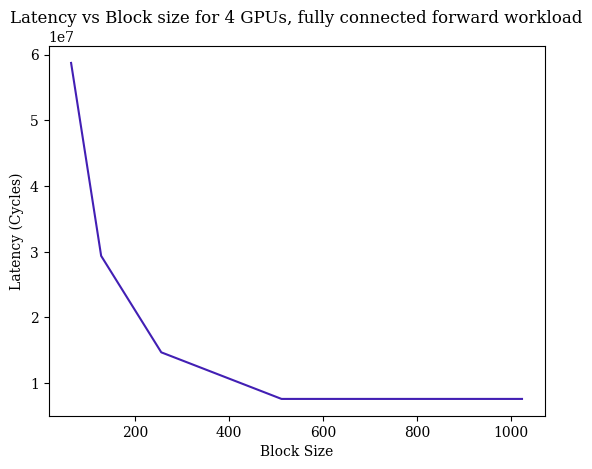

In [42]:
create_latency_plot("data/FC_blocksize_sweep.csv", "Blocksize", "Block Size", "Latency vs Block size for 4 GPUs, fully connected forward workload")

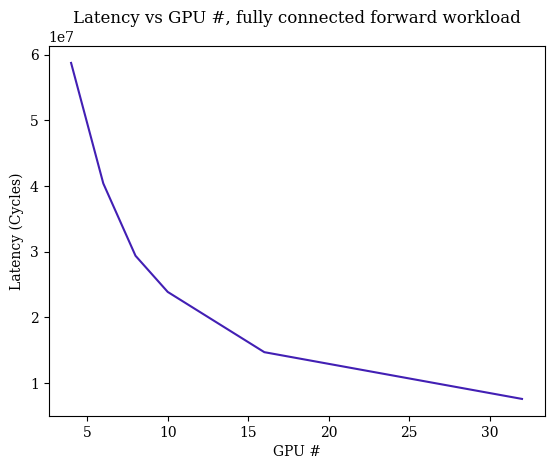

In [40]:
create_latency_plot("data/FC_GPU_num_sweep.csv", "GPU #", "GPU #", "Latency vs GPU #, fully connected forward workload")


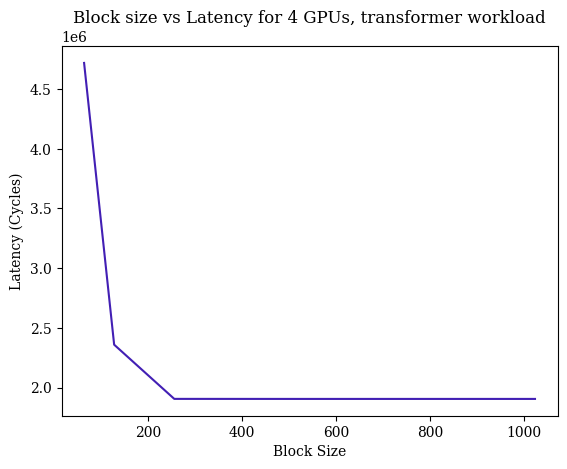

In [33]:
create_latency_plot("data/TF_blocksize_sweep.csv", "Blocksize", "Block Size", "Latency vs Block size for 4 GPUs, transformer workload")


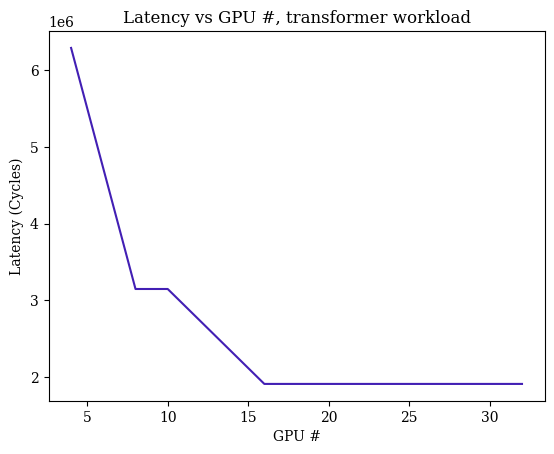

In [41]:
create_latency_plot("data/TF_GPU_num_sweep.csv", "GPU #", "GPU #", "Latency vs GPU #, transformer workload")



In [35]:
def create_energy_plot(file_in, title, index, x_title):
    df = pd.read_csv(file_in)
    df_subset = df.set_index(index)[['Global Memory Read Energy', 'Global Memory Write Energy', 'GPU Memory Read Energy', 'GPU Memory Write Energy', 'Compute Energy', 'Communication Energy']]
    df_subset.plot(kind='bar', stacked=True)
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel("Energy (fJ)")
    plt.show()

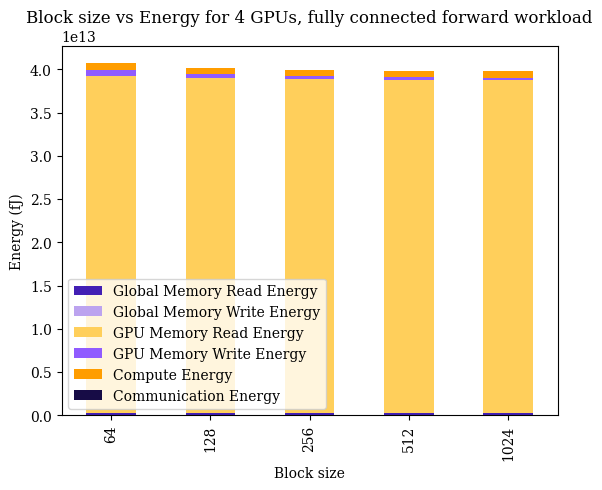

In [36]:
create_energy_plot("data/FC_blocksize_sweep.csv", "Block size vs Energy for 4 GPUs, fully connected forward workload", 'Blocksize', "Block size")

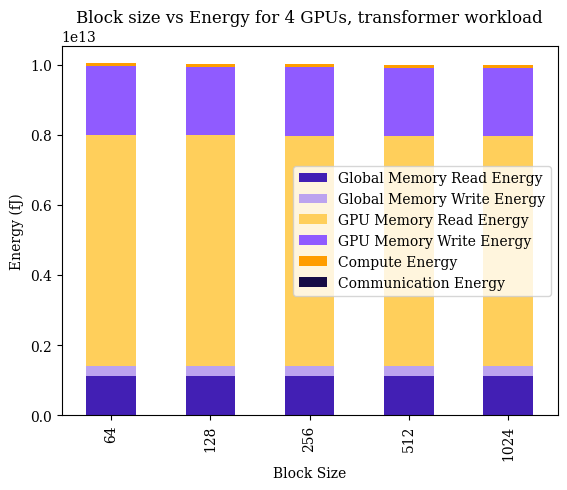

In [37]:
create_energy_plot("data/TF_blocksize_sweep.csv", "Block size vs Energy for 4 GPUs, transformer workload", 'Blocksize', 'Block Size')

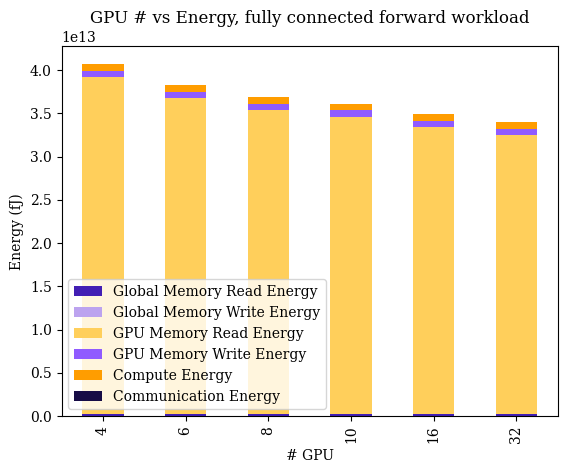

In [38]:
create_energy_plot("data/FC_GPU_num_sweep.csv", "GPU # vs Energy, fully connected forward workload", 'GPU #', "# GPU")


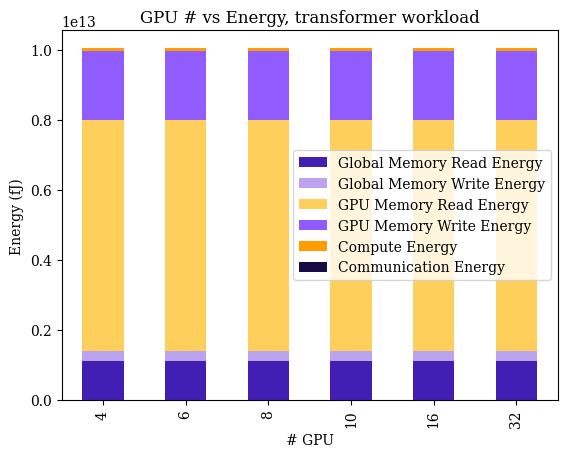

In [39]:
create_energy_plot("data/TF_GPU_num_sweep.csv", "GPU # vs Energy, transformer workload", 'GPU #', "# GPU")
